# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 7 submission</b></u>

### Roster Name: Benjamin Wu
### Student ID: 013607880
### Email address: benjamin.wu01@sjsu.edu

##  <u>Solution</u>

## Import libraries, setup random seed

In [105]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pandas as pd

In [106]:
np.random.seed(42)

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

## Code the solution

In [107]:
stratifiedDF = pd.DataFrame({'Stratified': [], 'Model': []})
accuracyDF = pd.DataFrame({'Accuracy': [], 'Model': []})

In [108]:
mnist = datasets.load_digits()

X = mnist.data
Y = mnist.target

for i in range(len(X)):
    X[i] = X[i].astype("float32") / 255

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [110]:
model1 = MLPClassifier(random_state=1, max_iter=10000).fit(X_train, Y_train)
model2 = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(400, 150, 50)).fit(X_train, Y_train)
model3 = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(64, 32, 8)).fit(X_train, Y_train)
model4 = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(32, 16)).fit(X_train, Y_train)
model5 = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(120, 64, 16)).fit(X_train, Y_train)
model6 = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(320, 120, 32)).fit(X_train, Y_train)

In [111]:
models = (model1, model2, model3, model4, model5, model6)
for i in range(len(models)):
    results = cross_val_score(models[i], X_train, Y_train, cv=5)
    accuracy = models[i].score(X_test, Y_test)
    for j in results:
        stratifiedDF.loc[len(stratifiedDF.index)] = [j, "Model" + str(i + 1)]
    accuracyDF.loc[len(accuracyDF.index)] = [accuracy, "Model" + str(i + 1)]

<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

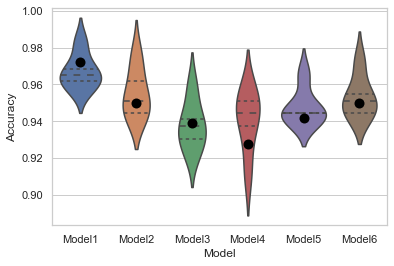

In [112]:
sns.violinplot(x="Model", y="Stratified", data=stratifiedDF, inner="quartile")
sns.swarmplot(x="Model", y="Accuracy", data=accuracyDF, size=10, color="black")